In [1]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import os
import glob

In [41]:
def known_clean_data(accel_data,gyro_data,num_punches,window,category,user):

    # Initial cleaning of data from raw accel to ID events.
    # Input data as Accel and Gyro data from Mbeint Labs Sensor App
    # Predetermined number of punches (num_punches)
    # Returns timestamp of event (punch) and windowed data at each event
    # for further processing prior to modeling.

    # INPUTS
    # -------------------------------------------------------------------
    # accel_data - pandas df
    # gyro_data - pandas df
    # num_punches - int - prescribed number of punches per this trial
    # window - int - how many data points before and after spike occurs
    # category - str - what category of punch (jab, left hook, etc.)
    # user - who dun it

    # OUTPUT
    # -------------------------------------------------------------------
    # punch_data - json object containing cleaning params and data of punches
    #              params - dict of dict {category, num_punches, window}
    #              data -  list of pandas dataframes containing sensor data with target labels.  

    # drop extraneous columns
    drop_cols = ['epoch (ms)','time (-08:00)']
    accel_data = accel_data.drop(drop_cols,axis=1)
    gyro_data = gyro_data.drop(drop_cols,axis=1)
    gyro_data = gyro_data.drop(['elapsed (s)'],axis=1)
    

    # join into single data set
    combined = accel_data.merge(gyro_data,how="outer", left_index=True, right_index=True)

    # calculate magnitude col to ID top events
    combined["magnitude"] = np.sqrt(combined["X-Axis (g)"]**2+combined["Y-Axis (g)"]**2+combined["Z-Axis (g)"]**2)

    # determine row indicies of num_punches number of events
    event_index = sorted(combined.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(num_punches).to_dict())

    # magnitude unnecessary once used to ID location of events
    combined = combined.drop(["elapsed (s)","magnitude"],axis=1)

    # find event and store window of data surrounding it
    punch_data = []
    for each in event_index:
        punch_data.append(combined.iloc[each-window:each+window+1].reset_index(drop=True))
    
    data_obj = {}
    data_obj['params'] = {}
    data_obj['params']['category'] = category
    data_obj['params']['num_punches'] = num_punches
    data_obj['params']['window'] = window
    data_obj['params']['fighter'] = user
    data_obj['data'] = punch_data
    
    current_time = datetime.now().strftime("%m.%d.%Y, %H.%M.%S")
    file_name = '{} win{} - {}'.format(category,num_punches,window,current_time)
    with open('/Users/matthewhwang/Galvanize/fightclub/data/processed/{}/{}.p'.format(category,file_name), 'wb') as f:
        pickle.dump(data_obj, f)
    with open('/Users/matthewhwang/Galvanize/fightclub/data/processed/all/{}.p'.format(file_name), 'wb') as f:
        pickle.dump(data_obj, f)
    print("Stored {} successfully".format(file_name))
    
    
    pass

In [76]:
import os

path = '/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook'

folders = []

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for folder in d:
        folders.append(os.path.join(r, folder))

for f in folders:
    print(f)

/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 50 Matt_2019-11-05T16-38-07.845
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 10 Eric_2019-11-05T11-58-49.181
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 10 Adam_2019-11-05T12-23-07.934
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 90 Matt Combc RH_2019-11-09T13-57-17.403
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 10 Matt_2019-11-05T12-00-44.196
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 10 Jack_2019-11-05T16-21-09.623
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 100 Matt Combc RH_2019-11-09T14-14-35.807
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 25 Aaron_2019-11-05T14-12-23.107
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 20 Matt Combc RH_2019-11-09T14-41-53.730
/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Lef

In [ ]:
import glob

path = 'c:\\projects\\hc2\\'

files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

for f in files:
    print(f)

In [77]:
files = [f for f in glob.glob(folders[0] + "**/*.csv")]

In [78]:
files

['/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 50 Matt_2019-11-05T16-38-07.845/Left Hook 50 Matt_Accelerometer_2019-11-05T16-38-07.845.csv',
 '/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 50 Matt_2019-11-05T16-38-07.845/Left Hook 50 Matt_Gyroscope_2019-11-05T16-38-07.845.csv']

In [79]:
folders[0]

'/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 50 Matt_2019-11-05T16-38-07.845'

In [80]:
files[0]

'/Users/matthewhwang/Galvanize/fightclub/data/raw/Left Hook/Left Hook 50 Matt_2019-11-05T16-38-07.845/Left Hook 50 Matt_Accelerometer_2019-11-05T16-38-07.845.csv'

In [81]:
import pandas as pd

In [82]:
accel = pd.read_csv(files[0])

In [83]:
accel.head()

,epoch (ms),time (-08:00),elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g)
0,1573000687885,2019-11-05T16:38:07.885,0.000,-0.196,-0.501,0.861
1,1573000687926,2019-11-05T16:38:07.926,0.041,-0.192,-0.522,0.870
2,1573000687965,2019-11-05T16:38:07.965,0.080,-0.189,-0.506,0.865
3,1573000688005,2019-11-05T16:38:08.005,0.120,-0.195,-0.522,0.866
4,1573000688046,2019-11-05T16:38:08.046,0.161,-0.203,-0.504,0.876


In [84]:
gyro.head()

NameError: name 'gyro' is not defined

In [85]:
name = files[0].split('/')[-1].split(' ')

In [86]:
name

['Left', 'Hook', '50', 'Matt_Accelerometer_2019-11-05T16-38-07.845.csv']

In [87]:
category = name[0] + " " + name[1]

In [88]:
category

'Left Hook'

In [89]:
count = int(name[2])

In [90]:
user = name[3]

In [91]:
accel_data = pd.read_csv(files[0])

In [92]:
gyro_data = pd.read_csv(files[1])

In [58]:
drop_cols = ['epoch (ms)','time (-08:00)']
accel_data = accel_data.drop(drop_cols,axis=1)
gyro_data = gyro_data.drop(drop_cols,axis=1)
gyro_data = gyro_data.drop(['elapsed (s)'],axis=1)

In [59]:
gyro_data

,X-Axis (g),Y-Axis (g),Z-Axis (g)
0,0.147,0.647,0.773
1,0.149,0.654,0.779
2,0.149,0.652,0.779
3,0.148,0.652,0.778
4,0.150,0.652,0.780
5,0.149,0.651,0.780
6,0.150,0.651,0.778
7,0.148,0.651,0.780
8,0.149,0.651,0.780
9,0.149,0.652,0.781


In [60]:
combined = accel_data.merge(gyro_data,how="outer", left_index=True, right_index=True)


In [61]:
combined.head()

,elapsed (s),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s),X-Axis (g),Y-Axis (g),Z-Axis (g)
0,0.000,-0.244,0.061,0.732,0.147,0.647,0.773
1,0.040,-0.305,0.244,0.610,0.149,0.654,0.779
2,0.081,-0.244,0.183,0.793,0.149,0.652,0.779
3,0.120,-0.183,0.061,0.793,0.148,0.652,0.778
4,0.162,-0.183,0.122,0.793,0.150,0.652,0.780


In [62]:
import numpy as np

In [63]:
combined["magnitude"] = np.sqrt(combined["X-Axis (g)"]**2+combined["Y-Axis (g)"]**2+combined["Z-Axis (g)"]**2)

In [64]:
combined.head()

,elapsed (s),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s),X-Axis (g),Y-Axis (g),Z-Axis (g),magnitude
0,0.000,-0.244,0.061,0.732,0.147,0.647,0.773,1.018699
1,0.040,-0.305,0.244,0.610,0.149,0.654,0.779,1.027987
2,0.081,-0.244,0.183,0.793,0.149,0.652,0.779,1.026716
3,0.120,-0.183,0.061,0.793,0.148,0.652,0.778,1.025813
4,0.162,-0.183,0.122,0.793,0.150,0.652,0.780,1.027621


In [65]:
event_index = sorted(combined.sort_values(["magnitude"],ascending=False)["magnitude"].head(count).to_dict())

In [66]:
events = combined.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(count).values

In [67]:
events

array([ 52.206, 226.839,  34.429, 225.955, 113.681, 229.247,  28.008,
        31.861, 125.117,  22.713,  48.755,  66.45 , 114.683, 224.23 ,
        74.997,  58.666, 115.647,  70.623, 112.597, 109.427,  53.329,
        51.122, 228.364, 124.153, 193.373,  83.866,  41.732, 150.356,
       141.087, 205.612,  64.364, 144.178,  73.915, 154.49 , 149.272,
       216.085, 206.615, 200.555, 128.086,  42.895,  95.061, 230.009,
       127.043, 194.376, 106.137, 160.87 ,  29.293, 139.04 , 159.746,
       219.736,  55.415, 202.562, 218.893, 107.261, 174.192, 108.384,
       133.824, 137.997,  60.954, 135.91 , 225.113, 145.14 , 111.554,
       220.659, 164.08 , 147.186, 177.122,  72.791, 199.552, 165.084,
       207.457, 155.492, 227.641,  89.483,  79.492, 126.079, 201.558,
        86.113,  81.66 , 217.931,  71.747,  62.117, 172.226,  57.542,
       153.446, 129.972, 222.425, 209.464, 216.967,  33.145, 158.703,
       195.5  , 183.06 ,  92.854, 136.994, 117.733,  47.631,  44.06 ,
       211.31 ,  67.

In [68]:
import seaborn as sb
import matplotlib.pyplot as plt

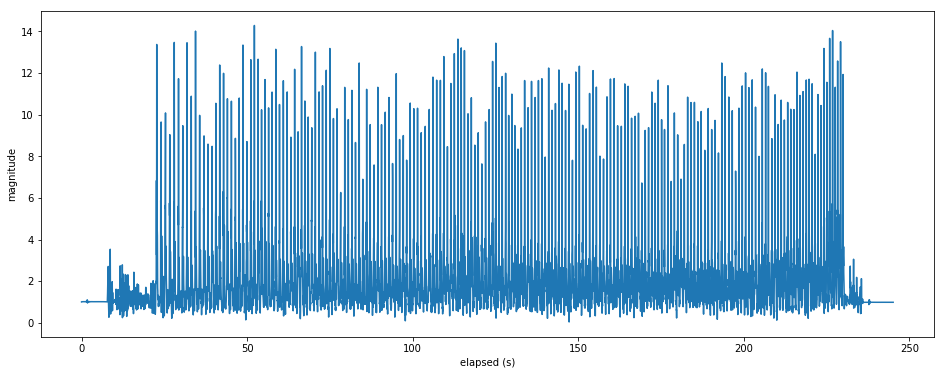

In [69]:
plt.figure(figsize=(16, 6))
sb.lineplot(combined["elapsed (s)"],combined["magnitude"])
# for each in events:
#     plt.axvline(each,color="r")

In [70]:
event_index

[566,
 599,
 632,
 664,
 665,
 698,
 730,
 762,
 794,
 826,
 858,
 889,
 922,
 952,
 983,
 1011,
 1040,
 1069,
 1098,
 1128,
 1158,
 1159,
 1187,
 1215,
 1244,
 1245,
 1274,
 1301,
 1329,
 1355,
 1381,
 1408,
 1434,
 1462,
 1490,
 1519,
 1548,
 1576,
 1577,
 1604,
 1630,
 1656,
 1681,
 1706,
 1733,
 1760,
 1788,
 1814,
 1842,
 1869,
 1896,
 1923,
 1981,
 2008,
 2035,
 2062,
 2090,
 2146,
 2173,
 2202,
 2230,
 2258,
 2286,
 2314,
 2341,
 2369,
 2394,
 2422,
 2447,
 2474,
 2501,
 2529,
 2557,
 2587,
 2617,
 2645,
 2673,
 2701,
 2727,
 2753,
 2754,
 2780,
 2806,
 2833,
 2858,
 2882,
 2909,
 2934,
 2960,
 2986,
 3013,
 3041,
 3068,
 3094,
 3118,
 3142,
 3166,
 3192,
 3215,
 3216,
 3239,
 3261,
 3285,
 3310,
 3335,
 3361,
 3387,
 3414,
 3439,
 3465,
 3490,
 3516,
 3541,
 3567,
 3593,
 3617,
 3643,
 3668,
 3695,
 3720,
 3747,
 3772,
 3798,
 3824,
 3850,
 3875,
 3902,
 3929,
 3955,
 3981,
 4009,
 4035,
 4063,
 4089,
 4114,
 4140,
 4167,
 4192,
 4242,
 4268,
 4292,
 4317,
 4341,
 4366,
 4388,


In [71]:
dummy = combined.iloc[2977-8:2977+8+1]

In [72]:
dummy

,elapsed (s),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s),X-Axis (g),Y-Axis (g),Z-Axis (g),magnitude
2969,119.138,-84.451,-54.512,186.220,1.503,-0.276,1.236,1.965421
2970,119.177,-59.939,32.256,113.841,1.146,-0.850,1.237,1.888382
2971,119.218,107.988,44.573,-25.976,0.497,-0.902,0.853,1.337244
2972,119.258,108.659,-0.915,-63.659,0.372,-0.410,0.608,0.822282
2973,119.299,68.780,-37.134,-82.500,0.434,-0.351,0.289,0.628552
2974,119.338,69.085,-65.244,-105.976,0.338,-0.414,0.174,0.562064
2975,119.378,31.646,-79.024,-111.890,0.175,-0.309,0.225,0.420394
2976,119.419,17.073,-83.963,-122.317,0.090,0.183,0.386,0.436560
2977,119.458,18.293,-83.963,-136.524,0.081,0.177,0.706,0.732343
2978,119.499,-9.878,-73.293,-130.366,0.398,-0.555,0.469,0.828487


In [73]:
dummy = dummy.reset_index(drop=True)

In [74]:
dummy

,elapsed (s),X-Axis (°/s),Y-Axis (°/s),Z-Axis (°/s),X-Axis (g),Y-Axis (g),Z-Axis (g),magnitude
0,119.138,-84.451,-54.512,186.220,1.503,-0.276,1.236,1.965421
1,119.177,-59.939,32.256,113.841,1.146,-0.850,1.237,1.888382
2,119.218,107.988,44.573,-25.976,0.497,-0.902,0.853,1.337244
3,119.258,108.659,-0.915,-63.659,0.372,-0.410,0.608,0.822282
4,119.299,68.780,-37.134,-82.500,0.434,-0.351,0.289,0.628552
5,119.338,69.085,-65.244,-105.976,0.338,-0.414,0.174,0.562064
6,119.378,31.646,-79.024,-111.890,0.175,-0.309,0.225,0.420394
7,119.419,17.073,-83.963,-122.317,0.090,0.183,0.386,0.436560
8,119.458,18.293,-83.963,-136.524,0.081,0.177,0.706,0.732343
9,119.499,-9.878,-73.293,-130.366,0.398,-0.555,0.469,0.828487


In [93]:
known_clean_data(accel_data,gyro_data,200,8,category,user)

Stored Left Hook win200 - 8 successfully


In [107]:
def load_data():
    # Combines all data in load data folder in processed directory
    # Standardizes data accross all
    # Returns X and Y numpy arrays ready to be split into test and training sets

    print("Load Data Begin")
    path = '/Users/matthewhwang/Galvanize/fightclub/data/processed/load_data/'
    
    files = [f for f in glob.glob(path + "*.p")]

    cypher = {"Left Jab": 1,
              "Right Cross": 2,
              "Left Hook": 3,
              "Right Hook": 4}
    
    master = []
    labels = []
    megaframe = pd.DataFrame()
    for each in files:
        data = pickle.load(open(each,'rb'))
        category = cypher[data['params']['category']]
        for i in range(len(data['data'])):
            labels.append(category)
        for event in data['data']:
            master.append(event)
            megaframe = megaframe.append(event)




    return master,labels,megaframe

In [108]:
master,labels,megaframe = load_data()

Load Data Begin


In [109]:
std = megaframe.std()

In [110]:
mean = megaframe.mean()

In [115]:
(master[0]-mean)/std

,X-Axis (g),X-Axis (°/s),Y-Axis (g),Y-Axis (°/s),Z-Axis (g),Z-Axis (°/s)
0,0.041866,0.143979,0.001817,-0.316921,0.098311,-0.138678
1,0.049814,0.171056,0.067929,-0.275592,0.188519,-0.033490
2,0.048679,0.110431,0.208368,-0.186802,0.384399,0.097681
3,-0.000994,-0.016808,0.411558,-0.042153,0.639558,0.324018
4,-0.051234,-0.153152,0.286058,0.149639,0.729336,0.665559
5,0.037325,-0.347005,0.047386,0.171270,0.483198,1.231250
6,0.170163,-0.276560,-0.189793,-0.132558,0.076833,1.895244
7,0.118504,-0.336941,-0.775456,-0.555850,-0.668456,2.315675
8,-0.064575,-0.794861,-1.296876,-0.986244,-1.683080,2.128152
9,-0.117937,-0.873217,-0.868834,-1.112492,-2.155168,1.061265


In [105]:
def standardize(df,std,mean):
    return np.array((df-mean)/std)